In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential 
from keras.utils import plot_model
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
(images_train, labels_train), (images_valid, labels_valid) = mnist.load_data()

In [3]:
num_train, img_height, img_width = images_train.shape
num_valid, _, _ = images_valid.shape
num_features = img_height * img_width

labels = np.unique(labels_train)
num_labels = len(labels)

Image label: 5


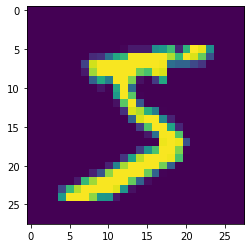

In [4]:
plt.imshow(images_train[0, :, :])
print(f"Image label: {labels_train[0]}")

In [5]:
images_train_normed = images_train.reshape(num_train, -1) / 255.0
images_valid_normed = images_valid.reshape(num_valid, -1) / 255.0

In [6]:
labels_train_onehot = pd.get_dummies(labels_train).values
labels_valid_onehot = pd.get_dummies(labels_valid).values

In [7]:
num_labels

10

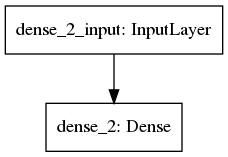

In [9]:
model = Sequential() 
model.add(Dense(num_labels, input_dim=num_features, activation='softmax')) 
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
plot_model(model)

In [11]:
model.fit(images_train_normed,
          labels_train_onehot,
          epochs=10)

Epoch 1/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.3681 - accuracy: 0.8991
Epoch 2/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.3538 - accuracy: 0.9026 0s - loss: 0.3533 - accu
Epoch 3/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.3434 - accuracy: 0.9048
Epoch 4/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.3354 - accuracy: 0.9071
Epoch 5/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.3288 - accuracy: 0.9089
Epoch 6/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.3235 - accuracy: 0.9106
Epoch 7/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.3188 - accuracy: 0.9118
Epoch 8/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.3150 - accuracy: 0.9126
Epoch 9/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.3115 - accuracy: 0.9137
Epoch 10/10
60000/60000 [=====

In [14]:
labels_valid_fitted = model.predict_proba(x=images_valid_normed)
roc_auc = roc_auc_score(labels_valid_onehot,
                        labels_valid_fitted,
                        multi_class="ovr",
                        average="macro")
roc_auc

0.9931685853502656

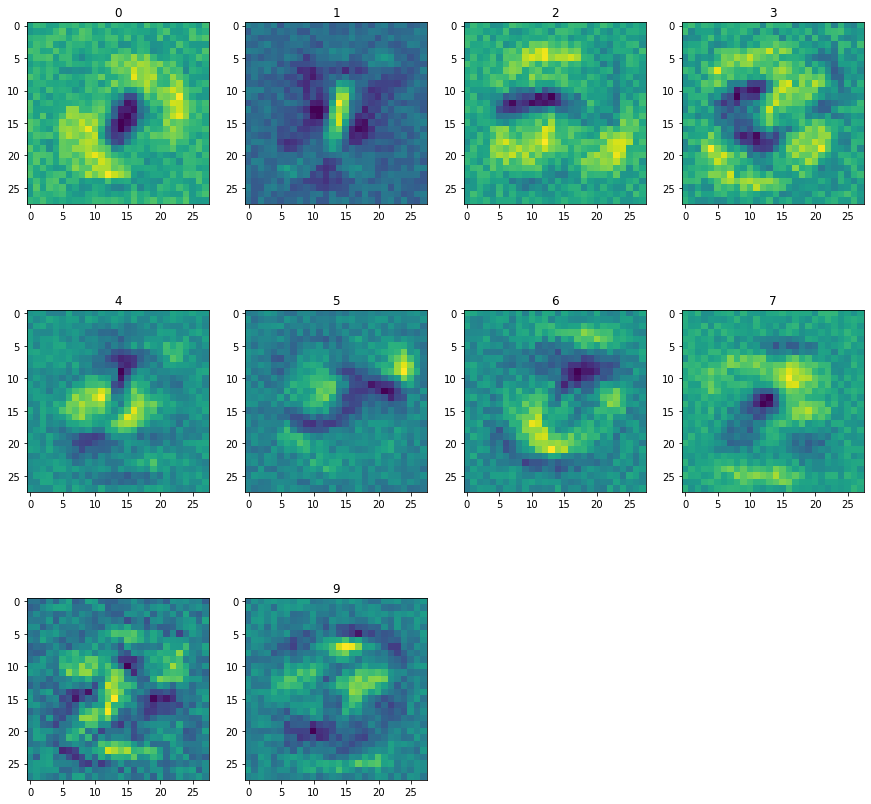

In [49]:
plt.figure(figsize=(15, 15))
for label in range(num_labels):
    plt.subplot(3, 4, label + 1)
    plt.imshow(model.get_weights()[0][:,label].reshape(img_height, img_width))
    plt.title(label)